<a href="https://colab.research.google.com/github/arifadli/KuliahStatProb/blob/main/Pearson_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 - Hypotesis : 
    - H0 = **no** hubungan linier antara umur dan tekanan darah 
    - H1 = hubungan linier umur dan tekanan darah
 - Significance level,  α = 5% 


---




In [43]:
sig_level = 0.05

In [44]:
# library
import pandas as pd
from scipy.stats import kstest, shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import math

1. Import Data

In [45]:
#df = pd.read_csv('Data Uji - Sheet.xls')
#df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Data Uji - Sheet.xls')
#read dataset
from google.colab import files
upload = files.upload()

import io
df = pd.read_csv(io.BytesIO(upload['Data Uji - Sheet.csv']))
df

Saving Data Uji - Sheet.csv to Data Uji - Sheet (7).csv


,Nama,Umur,Berat Badan,Tekanan Darah
0,Ari,34,45,108
1,Fadli,43,44,129
2,Nazwa,49,56,126
3,Paijo,58,57,149
4,Budi,64,65,168
5,Hasan,73,64,161
6,Rundi,78,56,174


In [46]:
df.head()

,Nama,Umur,Berat Badan,Tekanan Darah
0,Ari,34,45,108
1,Fadli,43,44,129
2,Nazwa,49,56,126
3,Paijo,58,57,149
4,Budi,64,65,168


**Variable input**

In [47]:
var1 = 'Umur'
var2 = 'Tekanan Darah'



---




In [48]:
# Uji Shapiro-Wilk (shapiro)
ag_test = shapiro(df[var1])
sp_test = shapiro(df[var2])

In [49]:
def shapiro_test(x):

  val = x[1]
  if val > 0.05:
    return 'Terima HO, Distribusi Normal dengan nilai ', round(val,2)
  else :
    return 'Tolak HO, Distribusi Normal dengan nilai ', round(val,2)


In [50]:
print(var1,'=', shapiro_test(ag_test))
print(var2,'=',shapiro_test(sp_test) )

Umur = ('Terima HO, Distribusi Normal dengan nilai ', 0.91)
Tekanan Darah = ('Terima HO, Distribusi Normal dengan nilai ', 0.63)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



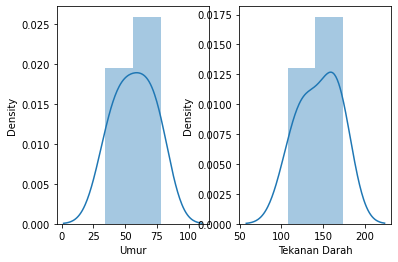

In [51]:
f, axes = plt.subplots(1,2)
sns.distplot(df[var1],ax=axes[0])
sns.distplot(df[var2],ax=axes[1])

3. Correlation

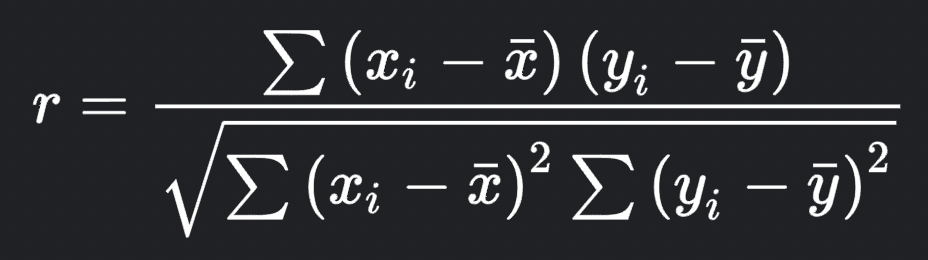

In [52]:
df = df[[var1,var2]]

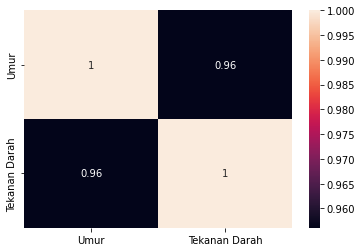

In [53]:
sns.heatmap(df.corr(method='pearson'),annot=True)

Interpretation
- 0.00 < 0.10 Negligible
- 0.10 < 0.20 Weak
- 0.20 < 0.40 Moderate
- 0.40 < 0.60 Relatively strong
- 0.60 < 0.80 Strong
- 0.80 <= 1.00 Very strong

4. Hypotesis Testing

T Score Formula :

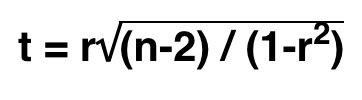

In [54]:
# T Score
val_corr = df.corr(method='pearson').reset_index()[[var2]].loc[0][0]
t_score =  val_corr*(math.sqrt((len(df)-2) / (1 - pow(val_corr,2))))

# Two tailed, t-table
t_table = scipy.stats.t.ppf(q=1-sig_level/2,df=len(df)-2)

if t_score > t_table:
  print('Tolak H0, Terima H1')
  print('Hubungan Linier Umur dan Tekanan Darah')
else:
  print('Terima H0, Tolak H1')
  print('Hubungan Linier Umur dan Tekanan Darah')

Tolak H0, Terima H1
Hubungan Linier Umur dan Tekanan Darah




---



---



---



In [55]:
import plotly.express as px

fig = px.scatter(df, x=var1, y=var2, trendline="ols")
fig.show()